# Airy Disk

- 円形開口の平面波を作り (pupa)-> コロナグラフ関数としてFTだけするもの（No coronagraph function）を適用 -> 焦点面を算出(foca)するコード。すなわち単にAiry Diskが出てくる

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [10]:
import pylab
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#from fossim/src
import plain_wave as pw
import mask_circular as mc
import no_coronagraph as nc

## 星からの光を作る
星や惑星からの光は、位相のついた平面波で表される。いま微妙にoff axisを考えてみよう。

In [12]:
n=512 # sampling rate at a pupil
pos_star=[0.5,1.0] #angle in unit of lambda/D
pupa = pw.wg_plain_wave(n,pos_star)

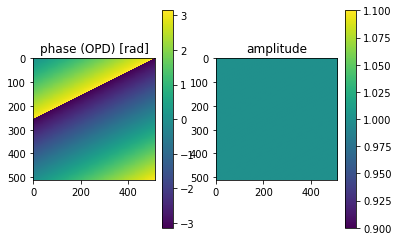

In [13]:
fig = plt.figure()
ax = fig.add_subplot(121)
q=ax.imshow(np.angle(pupa))
plt.title("phase (OPD) [rad]")
plt.colorbar(q)
ax = fig.add_subplot(122)
q=ax.imshow(np.abs(pupa))
plt.title("amplitude")
plt.colorbar(q)
plt.show()

## 円形開口マスク
望遠鏡のマスクはpupil to pupil_maskの関数である

In [18]:
mask=mc.p2pm_circular(pupa)
pupa[mask]=0.0+0.0j

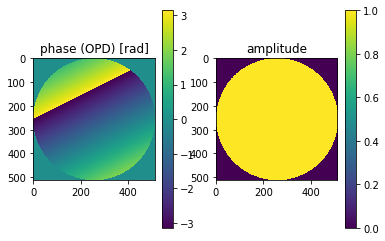

In [17]:
#表示

fig = plt.figure()
ax = fig.add_subplot(121)
q=ax.imshow(np.angle(pupa))
plt.title("phase (OPD) [rad]")
plt.colorbar(q)
ax = fig.add_subplot(122)
q=ax.imshow(np.abs(pupa))
plt.title("amplitude")
plt.colorbar(q)
plt.show()

## No coronagraph function = すなわち単にpupil -> focal plane をかけてみる。
- ここでのポイントは単に瞳での配列をFTすると焦点面での分解能は$\lambda/D$程度になってしまうため、コロナグラフ関数設計では、zero-paddingした拡大配列に入れてからFTをすることが基本となる。下のexpratは拡大率。

In [8]:
exprat=8 #oversampling factor at a focal plane
foca = nc.cf_no_coronagraph(pupa,exprat=exprat)

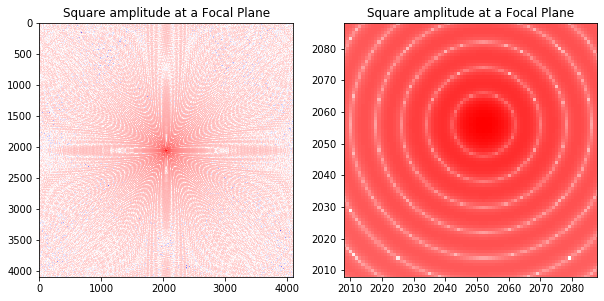

In [9]:
#表示
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(121)
a=ax.imshow(np.log10(np.abs(foca)**2),cmap="bwr")
#plt.colorbar(a)
plt.title("Square amplitude at a Focal Plane")
ax=fig.add_subplot(122)
a=ax.imshow(np.log10(np.abs(foca)**2),cmap="bwr")
#plt.colorbar(a)
nx=foca.shape[0]
ny=foca.shape[1]
plt.xlim(nx/2-5*exprat,nx/2+5*exprat)
plt.ylim(ny/2-5*exprat,ny/2+5*exprat)
plt.title("Square amplitude at a Focal Plane")
plt.show()

Airy diskが現われる